In [2]:
# Fixing inports
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# Setting up class
class LinearRegression:
    def __init__(self):
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)
        
        self.W = tf.Variable([[0.0], [0.0]])
        self.b = tf.Variable([[0.0]])
        
        self.f = tf.matmul(self.x, self.W) + self.b
        
        self.loss = tf.reduce_mean(tf.square(self.f - self.y))

In [3]:
# Reading data
data = pd.read_csv('day_length_weight.csv')

x = np.mat(data.iloc[:, 1:].values)
y = np.mat(data.iloc[:, :1].values)

In [5]:
print(x)

[[84.86551157 13.03020797]
 [92.82212045 14.71908121]
 [98.52183024 21.01954905]
 ...
 [72.6862914   9.77971351]
 [98.43184093 16.2861623 ]
 [71.6968219   9.21390674]]


In [4]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)

In [7]:
model = LinearRegression()
mini_op = tf.train.GradientDescentOptimizer(0.0001).minimize(model.loss)

session = tf.Session()
session.run(tf.global_variables_initializer())

for i in range(500000):
    session.run(mini_op, {model.x: x_train, model.y: y_train})

W, b, loss = session.run([model.W, model.b, model.loss], {model.x: x_test, model.y: y_test})
predictions = session.run(model.f, {model.x: x_test, model.y: y_test})

<IPython.core.display.Javascript object>


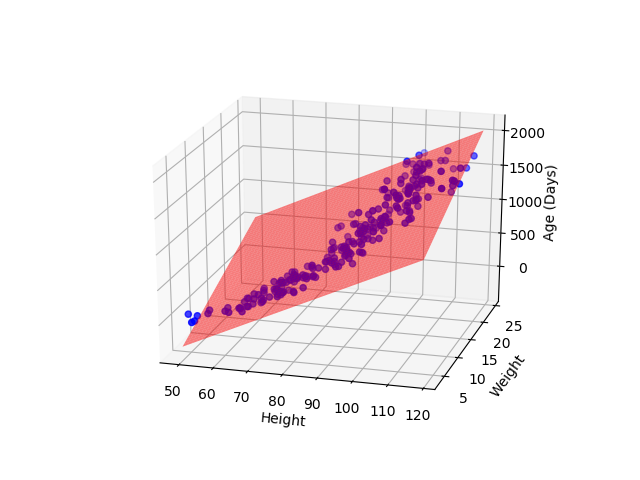

Loss: 26893.36


In [8]:
%matplotlib notebook

# Fixing data for plotting the prediction plane
x_temp = x_test[:, 0].T.tolist()[0]
y_temp = x_test[:, 1].T.tolist()[0]

x_lin = np.linspace(np.min(x_temp), np.max(x_temp))
y_lin = np.linspace(np.min(y_temp), np.max(y_temp))
X, Y = np.meshgrid(x_lin, y_lin)

def function(X, Y):
    return X*W[0] + Y*W[1] + b
Z = function(X, Y)


# Plotting plane and observations
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_test[:,0], x_test[:, 1], y_test, c='blue')
ax.plot_surface(X, Y, Z, color='red', alpha=0.5)

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Age (Days)')
plt.show()

print('Loss: %.2f' % loss)